<a href="https://colab.research.google.com/github/RaoUmair98/BirdsCLEF-Voice/blob/main/CommonLit_Readability_Prize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%ls

sample_submission.csv  test.csv  train.csv


In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("train.csv")
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [9]:
df.isnull()

,id,url_legal,license,excerpt,target,standard_error
0,False,True,True,False,False,False
1,False,True,True,False,False,False
2,False,True,True,False,False,False
3,False,True,True,False,False,False
4,False,True,True,False,False,False
...,...,...,...,...,...,...
2829,False,False,False,False,False,False
2830,False,False,False,False,False,False
2831,False,False,False,False,False,False
2832,False,False,False,False,False,False


In [10]:
df.isnull().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

In [21]:
df['url_legal']=df['url_legal'].fillna(df['url_legal'].mode()[0])


In [23]:
df['license']=df['license'].fillna(df['license'].mode()[0])


In [24]:
df.shape

(2834, 6)

In [25]:
df.isnull().sum()

id                0
url_legal         0
license           0
excerpt           0
target            0
standard_error    0
dtype: int64

In [29]:
df.describe()

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [31]:
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,https://www.africanstorybook.org/,CC BY 4.0,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,https://www.africanstorybook.org/,CC BY 4.0,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,https://www.africanstorybook.org/,CC BY 4.0,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,https://www.africanstorybook.org/,CC BY 4.0,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,https://www.africanstorybook.org/,CC BY 4.0,Once upon a time there were Three Bears who li...,0.247197,0.510845


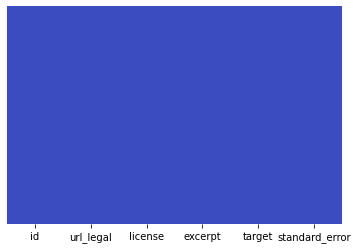

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')


In [35]:
df1=df.reset_index()['target']


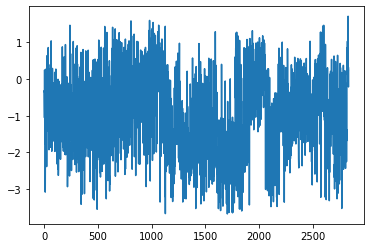

In [36]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
print(df1)


[[0.61919463]
 [0.62381385]
 [0.57467457]
 ...
 [0.72971919]
 [0.64239208]
 [0.7381773 ]]


In [39]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [43]:
training_size,test_size


(1842, 992)

In [42]:
train_data


array([[0.61919463],
       [0.62381385],
       [0.57467457],
       ...,
       [0.0147591 ],
       [0.1295078 ],
       [0.18277654]])

In [44]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [45]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [46]:
print(X_train.shape), print(y_train.shape)


(1741, 100)
(1741,)


(None, None)

In [47]:
print(X_test.shape), print(ytest.shape)


(891, 100)
(891,)


(None, None)

In [48]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [51]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [52]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
28/28 [==============================] - 9s 172ms/step - loss: 0.1156 - val_loss: 0.0268
Epoch 2/100
28/28 [==============================] - 4s 145ms/step - loss: 0.0305 - val_loss: 0.0267
Epoch 3/100
28/28 [==============================] - 4s 149ms/step - loss: 0.0307 - val_loss: 0.0267
Epoch 4/100
28/28 [==============================] - 4s 151ms/step - loss: 0.0299 - val_loss: 0.0264
Epoch 5/100
28/28 [==============================] - 4s 151ms/step - loss: 0.0301 - val_loss: 0.0265
Epoch 6/100
28/28 [==============================] - 4s 146ms/step - loss: 0.0306 - val_loss: 0.0279
Epoch 7/100
28/28 [==============================] - 4s 149ms/step - loss: 0.0294 - val_loss: 0.0261
Epoch 8/100
28/28 [==============================] - 4s 150ms/step - loss: 0.0296 - val_loss: 0.0264
Epoch 9/100
28/28 [==============================] - 4s 150ms/step - loss: 0.0314 - val_loss: 0.0264
Epoch 10/100
28/28 [==============================] - 4s 146ms/step - loss: 0.0306 - val_lo

In [54]:
import tensorflow as tf


In [55]:
tf.__version__


'2.4.1'

In [56]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [57]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [58]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.4513765885655336

In [59]:
math.sqrt(mean_squared_error(ytest,test_predict))

1.32159975138631

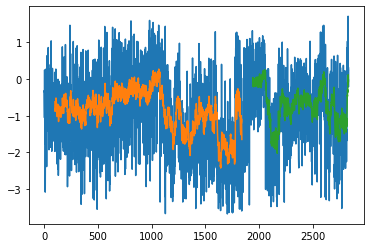

In [60]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [61]:
len(test_data)


992

In [62]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 651)

In [63]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [64]:
temp_input


[0.36839136529388955,
 0.4912745559406003,
 0.8384474375283241,
 0.4089504433243865,
 0.09890761636374223,
 0.10312924562986336,
 0.6689383672043302,
 0.7240297958058806,
 0.4591702082181318,
 0.5418161336013633,
 0.4598005251855649,
 0.5368238291535082,
 0.6301916860863616,
 0.7228979219095142,
 0.7916741685663173,
 0.7635423544733059,
 0.5745793773160344,
 0.5521592543297481,
 0.6118434668157087,
 0.49046715310935873,
 0.41497982072951334,
 0.43631529665136853,
 0.5690731055366252,
 0.5894414723014322,
 0.417973776024668,
 0.7746027887889535,
 0.4827924838801932,
 0.609098682329033,
 0.5432378505271012,
 0.8119431125318729,
 0.5983282495532011,
 0.5669827945265119,
 0.5528165696721337,
 0.8689616880998526,
 0.5749781803134631,
 0.5909006726782341,
 0.43269537618723214,
 0.6051041868362237,
 0.6598854984771119,
 0.41298084514502187,
 0.5762208032670822,
 0.6274010393682035,
 0.4364984389505377,
 0.3446775704528811,
 0.49473362134223237,
 0.507073404590522,
 0.7510825110712307,
 0.6395

In [78]:
from numpy import array

lst_output=[]
n_steps=650
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps,1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.49127456 0.83844744 0.40895044 0.09890762 0.10312925 0.66893837
 0.7240298  0.45917021 0.54181613 0.45980053 0.53682383 0.63019169
 0.72289792 0.79167417 0.76354235 0.57457938 0.55215925 0.61184347
 0.49046715 0.41497982 0.4363153  0.56907311 0.58944147 0.41797378
 0.77460279 0.48279248 0.60909868 0.54323785 0.81194311 0.59832825
 0.56698279 0.55281657 0.86896169 0.57497818 0.59090067 0.43269538
 0.60510419 0.6598855  0.41298085 0.5762208  0.62740104 0.43649844
 0.34467757 0.49473362 0.5070734  0.75108251 0.63952341 0.54823676
 0.31561309 0.42389537 0.32657242 0.05945752 0.43932746 0.56375569
 0.34903746 0.21532344 0.67738404 0.48443225 0.58468156 0.62059219
 0.6446363  0.55110753 0.55776624 0.66949333 0.74071738 0.61516349
 0.48047708 0.55811181 0.42193818 0.58399143 0.26352123 0.4609265
 0.35960206 0.48248294 0.71411864 0.24380978 0.33571043 0.42982082
 0.40625707 0.51466054 0.55178925 0.83519995 0.74175839 0.57529938
 0.63944845 0.65931745 0.55730008 0.37666526 0.4466

In [79]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [80]:
len(df1)


2834

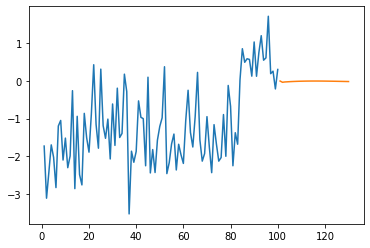

In [83]:
plt.plot(day_new,scaler.inverse_transform(df1[2734:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

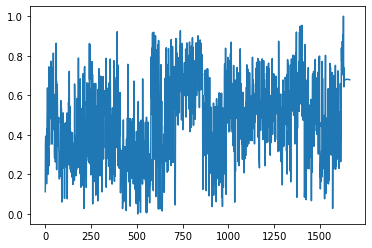

In [84]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [85]:
df3=scaler.inverse_transform(df3).tolist()


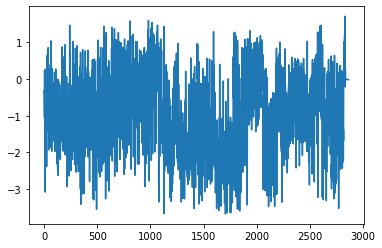

In [86]:
plt.plot(df3)
